# SEIRTQ model example
\begin{align}
\dot{S} & = -\beta \frac{S (I+T)}{N} + \frac{\rho_{RS}}{\tau_{RS}}R + \phi_{S}\\
\dot{E} & = \beta \frac{S (I+T)}{N} - \frac{1}{\tau_{EI}}E  + \phi_{E}\\
\dot{I} & = \frac{1}{\tau_{EI}}E - \frac{1}{\tau_{IR}} I - \kappa_{IT}(1+\kappa_{Tr})\frac{I}{N} + \phi_{I}\\
\dot{R} & = \frac{1}{\tau_{IR}} I + \frac{1}{\tau_{QR}}Q - \frac{\rho_{RS}}{\tau_{RS}}R + \phi_{R}\\
\dot{T} & = \kappa_{IT}(1+\kappa_{Tr}) \frac{I}{N} - \frac{1}{\tau_{TQ}}T + \phi_{T} \\
\dot{Q} & = \frac{1}{\tau_{TQ}}T - \frac{1}{\tau_{QR}}Q \\
\dot{N} & = \sum_{i} \phi_{i} \\
N_0 & = S_0+E_0+I_0+R_0+T_0+Q_0  \\
\end{align}

Where:  
* $S:$ Susceptible Individuals
* $E:$ Exposed Individuals
* $I:$ Infectious Individuals
* $R:$ Removed Individuals
* $T:$ Infected waiting for their exam results
* $Q:$ Quarantined individuals
* $\alpha:$ Average number of contacts per person per time
* $\beta:$ Probability of disease transmission in a contact between a susceptible and an infectious subject
* $N:$ Total population
* $\tau_{EI}:$ Transition time between exposed and infectious
* $\tau_{IR}:$ Transition time between infectious and recovered
* $\rho_{RS}:$ Immunity loss rate. Inverse of Immunity loss rate medium time ($\frac{1}{t_{RS}}$)  
* $\phi_S,\phi_E,\phi_I,\phi_R:$ External flux per compartment 

In [1]:
# Util libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# cv19 libraries
from cv19gm.models.seirtq import SEIRTQ
import cv19gm.utils.cv19functions as cv19functions
from cv19gm.cv19sim import CV19SIM

In [2]:
# For pop-up plots execute this code (optional)
if False:
    import platform
    OS = platform.system()

    if OS == 'Linux':    
        %matplotlib tk
        print('Linux')
    elif OS == 'Windows':
        %matplotlib qt
        print('Windows')
    elif OS == 'Darwin':
        %matplotlib tk
        print('Mac (Funciona?)')

# Build a basic SEIR model using a configuration file

## Constant parameters

In [3]:
# Input configuration file
config = 'cfg/SEIRTQ.toml'

In [4]:
# Build simulation object
model = SEIRTQ(config = config,beta=0.3)

In [5]:
model.solve()

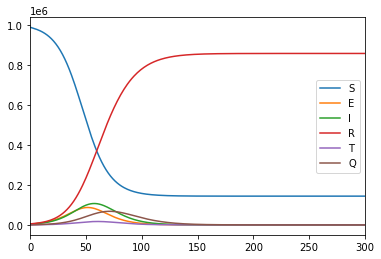

In [6]:
# Plot matplotlib
plt.plot(model.t,model.S,label='S')
plt.plot(model.t,model.E,label='E')
plt.plot(model.t,model.I,label='I')
plt.plot(model.t,model.R,label='R')
plt.plot(model.t,model.T,label='T')
plt.plot(model.t,model.Q,label='Q')
plt.xlim(0,300)
plt.legend(loc=0)
plt.show()

In [7]:
# Show results
model.results

,t,dates,S,E,E_d,I,I_d,R,R_d,T,...,tR_S,k_Ex,k_Eacc,k_Q,k_Tr,tQ_R,tT_Q,prevalence_total,prevalence_susc,prevalence_det
0,0,None,987212,1788,894,6000,3000,5000,0,0,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.018000,0.018000,0.018000
1,1,None,985461,3049,1433,5599,1425,5578,363,264,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.019426,0.019432,0.019432
2,2,None,983726,4069,1624,5465,986,6136,486,442,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.020413,0.020425,0.020425
3,3,None,981960,4933,1716,5523,942,6701,536,568,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.021355,0.021374,0.021374
4,4,None,980126,5702,1795,5723,1027,7291,572,665,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.022383,0.022408,0.022408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,143691,0,0,0,0,856308,0,0,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.864987,0.864987,0.864987
496,496,None,143691,0,0,0,0,856308,0,0,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.864987,0.864987,0.864987
497,497,None,143691,0,0,0,0,856308,0,0,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.864987,0.864987,0.864987
498,498,None,143691,0,0,0,0,856308,0,0,...,0.0,20000.0,0.9,1.0,2.0,14.0,3.0,0.864987,0.864987,0.864987


## Comparing different test rates
Create a function with time dependent parameters. Check covid19functions notebook for more information on this.

In [ ]:
# Input configuration file
config = 'cfg/SEIRTQ.toml'

In [ ]:
model2 = CV19SIM(config = config,model='SEIRTQ',k_Ex = [0,1000,10000,50000,100000])

In [ ]:
model2.solve()

In [ ]:
for sim in model2.sims:
    plt.plot(sim.t,sim.I,label='I - ex:'+str(sim.k_Ex(0)))
    plt.plot(sim.t,sim.T,label='T - ex:'+str(sim.k_Ex(0)))
plt.xlim(0,300)
plt.legend(loc=0)
plt.title('Testing effectivity')
plt.show()